In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import os

In [2]:
result_dir = os.getcwd() + '/results/microbenchmark-experiments/'
plot = os.getcwd() + '/images/'

In [3]:
gem5Configs = ['UnCalib','Calib','Max']
benchmarks = ['CCa','CCe','CCm','CCh_st','CRm','CRf','CRd','CS1','CS3','EI','EF','ED1','EM1','EM5','MI','MC','MCS','MI','MD','MIM','MIM2']
exe_benchmarks = ['ED1','EI','EF','EM1','EM5']

In [4]:
# function to extract stats
def gem5GetStat(filename, stat):
    filename = os.path.join(result_dir, '', filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 1
        end = r.find('#', start)
        return float(r[start:end])

In [5]:
rows = []
for config in gem5Configs:
    cdir = result_dir + config + '/'
    for bm in benchmarks:
        rows.append([config, bm,
                     gem5GetStat(cdir + bm, 'sim_ticks')/285.7, #3.5GHz
                     gem5GetStat(cdir + bm, 'sim_insts'),
                     gem5GetStat(cdir + bm, 'sim_ops'),
                     gem5GetStat(cdir + bm, 'system.cpu.ipc')])

gem5_df = pd.DataFrame(rows, columns=['config', 'benchmark', 'cycles', 'instructions', 'ops', 'ipc'])

In [6]:
def CreateArray(config,benchmarks,stat):
    arr = []
    for bm in benchmarks:
        a = gem5_df[(gem5_df['benchmark']==bm) & (gem5_df['config']==config)]
        arr.append(a[stat].iloc[0])
    return arr


<Figure size 432x288 with 0 Axes>

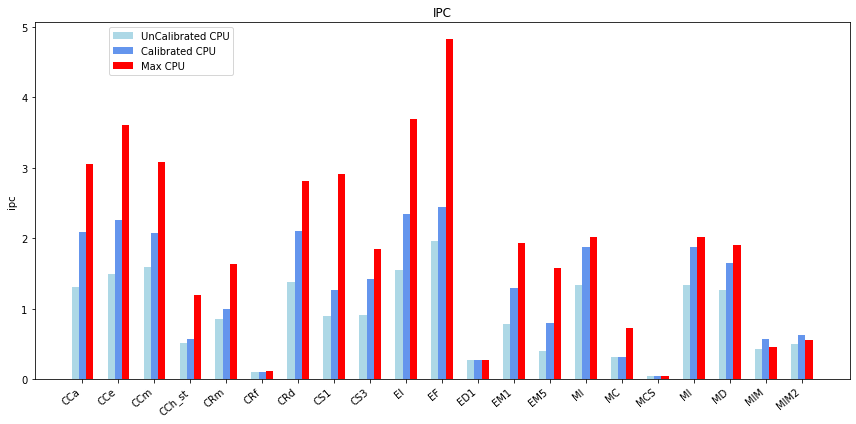

In [7]:
plot_title = 'IPC'

ylabel = 'ipc'
plt.figure()
plt.figure(figsize=(12,6))
N = np.arange(len(benchmarks))
barwidth = 0.2
displacement1 = N + barwidth
displacement2 = displacement1 + barwidth

UnClaib_ipc = CreateArray('UnCalib',benchmarks,'ipc')
Calib_ipc = CreateArray('Calib',benchmarks,'ipc')
Max_ipc = CreateArray('Max',benchmarks,'ipc')

plt.bar(N, UnClaib_ipc, barwidth, label='UnCalibrated CPU', color='lightblue')
plt.bar(displacement1, Calib_ipc, barwidth, label= 'Calibrated CPU', color='cornflowerblue')
plt.bar(displacement2, Max_ipc, barwidth, label='Max CPU', color='red')

plt.title(plot_title)
plt.legend(bbox_to_anchor=(0.25, 1))
plt.xticks(N+0.2, benchmarks, rotation=40, ha='right')
plt.ylabel(ylabel)
plt.tight_layout()
# plt.savefig(plot + 'microbenchmark_IPC' + '.png', format='png', dpi=600)

<Figure size 432x288 with 0 Axes>

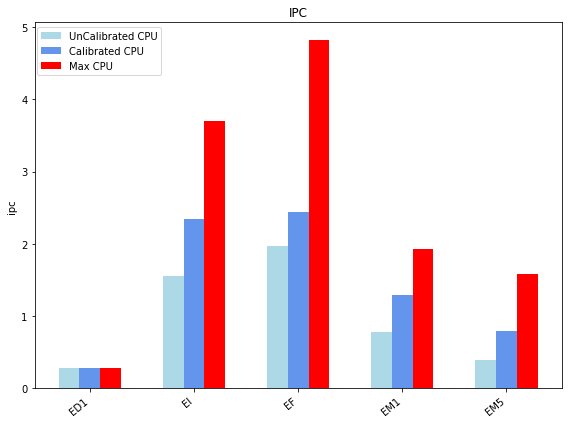

In [8]:
plot_title = 'IPC'

benchmarks = exe_benchmarks
ylabel = 'ipc'
plt.figure()
plt.figure(figsize=(8,6))
N = np.arange(len(benchmarks))
barwidth = 0.2
displacement1 = N + barwidth
displacement2 = displacement1 + barwidth

UnClaib_ipc = CreateArray('UnCalib',benchmarks,'ipc')
Calib_ipc = CreateArray('Calib',benchmarks,'ipc')
Max_ipc = CreateArray('Max',benchmarks,'ipc')

plt.bar(N, UnClaib_ipc, barwidth, label='UnCalibrated CPU', color='lightblue')
plt.bar(displacement1, Calib_ipc, barwidth, label= 'Calibrated CPU', color='cornflowerblue')
plt.bar(displacement2, Max_ipc, barwidth, label='Max CPU', color='red')

plt.title(plot_title)
plt.legend(bbox_to_anchor=(0.25, 1))
plt.xticks(N+0.2, benchmarks, rotation=40, ha='right')
plt.ylabel(ylabel)
plt.tight_layout()
# plt.savefig(plot + 'exe_IPC' + '.png', format='png', dpi=600)